# Ordinary Least Square (OLS)

When creating mathematical models for predictions, one of the most common, yet useful methodologies is known as Ordinary Least Squares or OLS.  OLS is a method for building a model via linear regression, meaning it is fitting coefficients ($\beta$ values in this case) to a model.

The goal of using OLS is to estimated the relationship between an inputs (the dependent variable or response, represented by $x$ in the equation below) and one or more outputs (the independent variable or predictor, represented by $y$ in the equation below). Now, let's take a look at an example to which OLS may apply to.

$$
y= \beta _2 x^2 + \beta _1 x + \beta _0 + \epsilon
$$

This equation can be represented on a 2D plot.  Here $\beta_0$ is the intercept and $\beta_1$ and $\beta_2$ are the coefficient for $x$ and $x^2$, respectively, and $\epsilon$ represents the error term between the proposed model and the data.  Note that while we only have one input, $x$, we can manipulate it to account for non-linear relationships in the model.  Here we chose $x^2$.  However, we can choose whatever manipulations to $x$ that we want ($ln(x)$, $\sqrt{x}$, etc) but this is largely problem dependant.  Our goal is to find the constant values of $\beta_0$, $\beta_1$, and $\beta_2$ that minimize the error of our model.  Because there is a linear relationship between each $\beta$ value and it's relative term, this is known as a linear model.

The coefficients are estimated using the least square method, which minimize the sum of square residuals (difference between observed and predicted values of $y$). While the derivation is outside the scope of this notebook, it can be easily found online {cite}`_ordinary_2024`.  The final formula is shown below: 
$$ 
\beta = (X^T X)^{-1} X^T y
$$
where $X$ is the design matrix of our inputs (columns for $x^2$, $x$, and constant in this example case) and $y$ is the vector of observed values.  Below is a code implementation of this approach that can be used to solve for the $\beta$ coefficients. Let's start by generating some data and visualizing it.

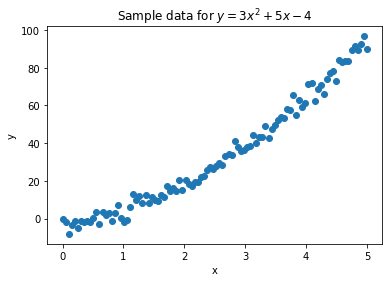

In [34]:
# Import relevant libraries
import numpy as np 
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(10)

# Generate data with added noise (noise representing epsilon error)
x = np.linspace(0,5,100)
y = 3*x**2 + 5*x - 4 + np.random.normal(0,3,len(x))

# Create Visualization
plt.scatter(x,y)
plt.title('Sample data for ' + r'$y=3x^2+5x-4$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Here, we can see that while the data has some randomness to it, there is a general shape to the curve. In this case, it is represented by our example, $y = 3x^2 + 5x - 4$.  Now, let's use OLS to predict the $\beta$ values.  To verify, we know we should get $\beta_2 \approx 3$, $\beta_1 \approx 5$, $\beta_0 \approx -4$. However, because we added noise to the data, these values will not be exact.

The beta values are: [ 2.91137882  5.28859742 -3.74100392]


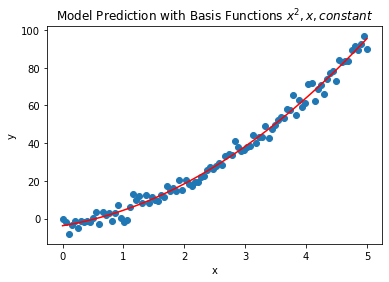

In [35]:
# Create a design matrix of our inputs with columns [x^2, x, 1]
input_matrix = np.vstack([x**2, x, np.ones(len(x))]).T

# Solve for the coefficients using OLS
betas = np.linalg.inv(input_matrix.T@input_matrix)@input_matrix.T@y
print('The beta values are:', betas)

# Let's create predictions of our model for visualization purposes
y_model = betas@input_matrix.T

# Create visualization with line representing the fit.
plt.scatter(x,y)
plt.plot(x,y_model,color = 'red')
plt.title('Model Prediction with Basis Functions ' + r'$x^2, x, constant$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

It can be seen that this is a very powerful tool for making predictions! However, note that this technique is only as good as the design matrix you create.  For example, let's instead create a model that replaces $x^2$ with $\sqrt(x)$.

The beta values are: [-43.041262    35.38053311   9.39519628]


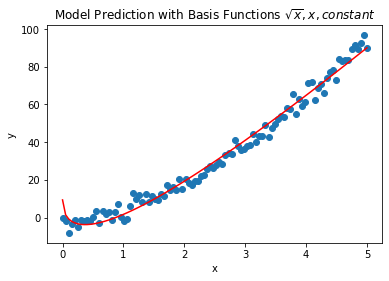

In [36]:
# Create a design matrix of our inputs with columns [ln(x), x, 1]
input_matrix_bad = np.vstack([np.sqrt(x), x, np.ones(len(x))]).T

# Solve for the coefficients using OLS
betas = np.linalg.inv(input_matrix_bad.T@input_matrix_bad)@input_matrix_bad.T@y
print('The beta values are:', betas)

# Let's create predictions of our model for visualization purposes
y_model_bad = betas@input_matrix_bad.T

# Create visualization with line representing the fit.
plt.scatter(x,y)
plt.plot(x,y_model_bad,color = 'red')
plt.title('Model Prediction with Basis Functions ' + r'$\sqrt{x}, x, constant$')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Here we can see that without the $x^2$ term, the model fit runs into issues.  Specifically, near 0, there is a large curve upwards.  Additionally, the parabolic shape is lost at higher values of x and is represented more linearly. To get a more analytical representation of if the transformations of x are bad, we can calculated the sum squared error outright for each and compare.

In [37]:
sum_squared_error = np.sum((y-y_model)**2)
sum_squared_error_bad = np.sum((y-y_model_bad)**2)

print('SSE for model with Basis Functions x^2, x, constant', sum_squared_error)
print('SSE for model with Basis Functions sqrt(x), x, constant', sum_squared_error_bad)

SSE for model with Basis Functions x^2, x, constant 833.7374009436863
SSE for model with Basis Functions sqrt(x), x, constant 1422.6957717728453


Here, we can see that the sum squared error is much higher for the model using the $\sqrt{x}$ basis function.  This means that the selection of $x^2$ is better.  However, this now begs the question, what about if we combined the two models and used one that has all the terms previously used in it?

The beta values are: [ 2.69137275 -4.11640242  7.8743761  -2.24366208]


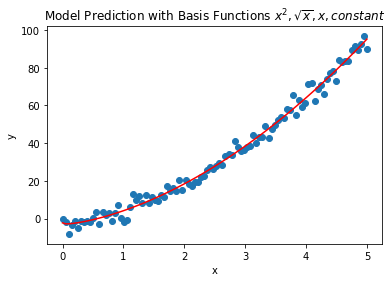

SSE for model with Basis Functions x^2, sqrt(x), x, constant 828.6016155582963


In [38]:
# Create a design matrix of our inputs with columns [x^2, sqrt(x), x, 1]
input_matrix_all = np.vstack([x**2, np.sqrt(x), x, np.ones(len(x))]).T

# Solve for the coefficients using OLS
betas = np.linalg.inv(input_matrix_all.T@input_matrix_all)@input_matrix_all.T@y
print('The beta values are:', betas)

# Let's create predictions of our model for visualization purposes
y_model_all = betas@input_matrix_all.T

# Create visualization with line representing the fit.
plt.scatter(x,y)
plt.plot(x,y_model_all,color = 'red')
plt.title('Model Prediction with Basis Functions ' + r'$x^2, \sqrt{x}, x, constant$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate SSE
sum_squared_error_all = np.sum((y-y_model_all)**2)
print('SSE for model with Basis Functions x^2, sqrt(x), x, constant', sum_squared_error_all)

Here, we can see that the sum squared error is the lowest out of any of the models! However, because we generated the data, we know that a model without the $\sqrt{x}$ term should be able to account for all of the input dependencies of the output $y$.  This is what is known as overfitting.  The more terms we add to the model, the lower the sum squared error will become.  However, this may not make the model generalizable, or be able to make predictions to new data.  Therefore, it is up to the person creating the model to determine what terms need to be included in the model to balance the accuracy of the model with the possibility of overfitting (aka: bias vs. variance tradeoff more formally).



## Singular Value Decomposition
Singular Value Decomposition is a mathematic technique in linear algebra that factors a matrix into three other matrices. It is powerful tool for analyzing of matrices and has wide range of application

Given any $m*n$ matrix $A$, SVD decomposed it intro three matrices: 
$$ 
A = U\sum V^T
$$

where:

$U$: An mxm orthogonal matrix whose columns are the left singular vector of A

$\sum$: An mxn diagonal matrix with non-negative real numbers on the diagonal, called singular values

$V$: An nxn orthogonal matrix whose columns are the singular vectors of $A$, and $V^T$ is the transpose of $V$


In [39]:
# Create a design matrix of our inputs with columns [x^2, x, 1]
input_matrix = np.vstack([x**2, x, np.ones(len(x))]).T

# Perform Singular Value Decomposition (SVD) on the design matrix
U, d, VT = np.linalg.svd(input_matrix, full_matrices = False)

# Inverse of singular values
d_inv = np.diag(1/d)
y_col = y[:, np.newaxis]

# Compute coefficients
beta = VT.T @ d_inv @ U.T @ y_col
beta = beta.flatten()

print(beta)

[ 2.91137882  5.28859742 -3.74100392]


[-0.08601457  9.70707182 39.80575357]
Intercept: 39.80575357295505, Linear coefficient: 9.707071824716863, Quadratic coefficient: -0.0860145701135771


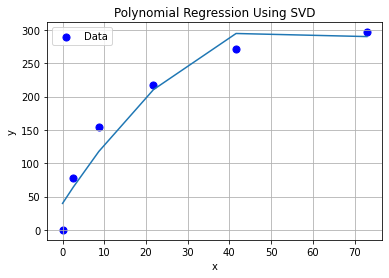

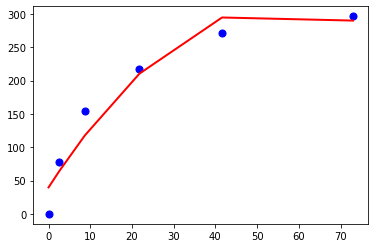

In [40]:
import numpy as np 
import matplotlib.pyplot as plt

# Real data 
x = np.array([0, 2.6,8.7,21.8,41.6,72.97])
y = np.array([0, 77.92, 153.9, 217.9, 271.1, 296.64])

X = np.vstack([x**2, x, np.ones(len(x))]).T

# Compute SVD of X
U, d, VT = np.linalg.svd(X, full_matrices = False)

# Compute the pseudo-inverse using SVD components
d_inv = np.diag(1 / d)
X_pseudo_inv = VT.T @ d_inv @ U.T

# Compute the coefficients
y_col = y[:, np.newaxis]
beta = X_pseudo_inv @ y_col
beta = beta.flatten()
print(beta)
intercept = beta[2]
linear = beta[1]
quadratic = beta[0]
print(f"Intercept: {intercept}, Linear coefficient: {linear}, Quadratic coefficient: {quadratic}")
y_pred = X @ beta

Y = beta[0]*x**2 + beta[1] * x + beta[2] 
# Plot the original data and the fitted polynomial curve
plt.scatter(x, y, color='blue', s=50, label='Data')
# plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Polynomial')
plt.plot(x,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression Using SVD')
plt.show()

plt.scatter(x, y, color='blue', s=50, label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Polynomial')